### Importing Libraries

In [10]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

### Test Set Image Processing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\Major Project\dataset\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1900 files belonging to 38 classes.
['Apple__Apple_scab', 'Apple__Black_rot', 'Apple__Cedar_apple_rust', 'Apple__healthy', 'Blueberry__healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spot

### Loading Model

In [12]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

### Visualizing and performing prediction on single image

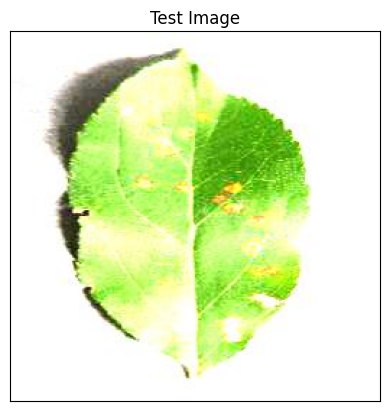

In [13]:
#Test Image Visualization
import cv2
image_path = r"D:\Major Project\dataset\test\dummy\AppleCedarRust1.JPG" 
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


### Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 494ms/step


In [15]:
print(predictions)

[[1.19339079e-01 2.21962370e-02 1.68976352e-01 4.54791618e-04
  1.04156137e-02 1.80256978e-01 4.16198200e-05 1.75463992e-05
  8.64793583e-06 2.21317146e-06 8.12044891e-05 4.43540560e-03
  1.10139372e-04 1.73258377e-04 4.31975379e-04 5.32289594e-03
  3.32076917e-03 7.76056277e-06 1.05370616e-03 1.00715784e-03
  7.30276297e-05 1.19077704e-04 5.20765207e-06 4.31936234e-04
  2.29156782e-07 1.94457170e-04 2.96200812e-02 4.32704994e-03
  3.67470528e-03 7.44253703e-05 9.49921552e-03 6.31006509e-02
  2.57194996e-01 7.02294165e-06 8.97675000e-06 1.13579676e-01
  4.23338090e-04 1.25483166e-05]]


In [16]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

32


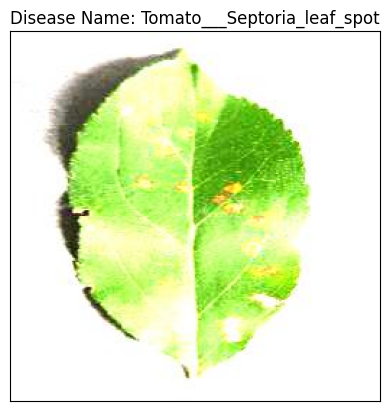

In [17]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Found 1900 images belonging to 38 classes.
Class names: ['Apple__Apple_scab', 'Apple__Black_rot', 'Apple__Cedar_apple_rust', 'Apple__healthy', 'Blueberry__healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_

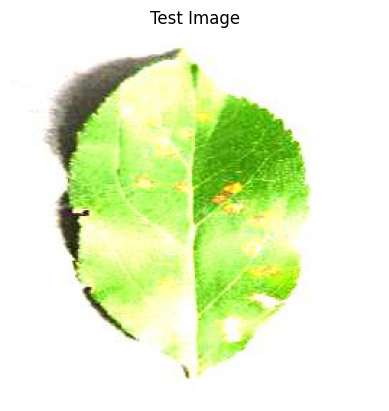

ValueError: in user code:

    File "d:\Major Project\venv\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "d:\Major Project\venv\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Major Project\venv\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "d:\Major Project\venv\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "d:\Major Project\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Major Project\venv\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 224, 224, 3)


In [20]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import os

# Set image size and batch size to match training
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Load class names using validation set
val_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_datagen.flow_from_directory(
    r'D:\Major Project\dataset\valid',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Get class labels
class_name = list(validation_set.class_indices.keys())
print("Class names:", class_name)

# Load the trained model
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Test image path
image_path = r"D:\Major Project\dataset\test\dummy\AppleCedarRust1.JPG"

# Read and display image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.axis('off')
plt.show()

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0  # Normalize
input_arr = np.expand_dims(input_arr, axis=0)

# Predict
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
model_prediction = class_name[result_index]

# Display prediction
print(f"Predicted Class Index: {result_index}")
print(f"Predicted Disease: {model_prediction}")

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.axis('off')
plt.show()